### Import Librery

In [1]:
import os
import glob
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import json
import pandas as pd
from matplotlib import image
from PIL import Image
%matplotlib inline

In [56]:
#!pip install Pillow --user -q
import PIL
print('Pillow Version:', PIL.__version__)
#!pip install --upgrade tensorflow==2.0.0b1 --user
import tensorflow as tf
print('TensorFlow Version:',tf.__version__)
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Pillow Version: 8.2.0
TensorFlow Version: 2.0.0-beta1


### Folder Structure

In [3]:
data_path = '/home/aanwar/models/research/slim/data/data/visualwakewords/'
count = 0
for name in glob.glob(data_path+'*'):
    print (name)
    if count == 3: break
    count +=1

/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset
/home/aanwar/models/research/slim/data/data/visualwakewords/labels.txt
/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_train2014.json
/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_val2014.json


### Labels

In [36]:
with open(data_path + 'labels.txt') as file:
    data = file.read()
print(data)

0:background
1:person



In [37]:
classes = []
file1 = open(data_path + 'labels.txt', 'r')
 
while True:
    line = file1.readline()
    if not line:
        break
    classes.append(line.strip().split(':')[1])
 
file1.close()
print(classes)

['background', 'person']


### Training data

In [38]:
train_data = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/'
# print(glob.glob(train_data+'*'))

count = 0
for name in glob.glob(train_data+'*'):
    print (name)
    count +=1
    if count == 9: break

/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000270070.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000101772.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000359320.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000486482.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000116155.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000082143.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000242307.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000510484.jpg
/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train20

In [39]:
totalFiles = 0
totalDir = 0

for base, dirs, files in os.walk(train_data):
    print('Searching in : ',base)
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFiles += 1
        
print('Total number of files',totalFiles)
print('Total Number of directories',totalDir)
print('Total:',(totalDir + totalFiles))

Searching in :  /home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/
Total number of files 82783
Total Number of directories 0
Total: 82783


### Training labels

In [40]:
train_img_labels = '/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_train2014.json'

with open(train_img_labels) as f:
    data = json.load(f)

In [41]:
data.keys()

dict_keys(['images', 'annotations', 'categories'])

In [42]:
data['images'][0]

{'license': 5,
 'file_name': 'COCO_train2014_000000057870.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-14 16:28:13',
 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
 'id': 57870}

In [43]:
data['annotations']['392136']

{'objects': [{'area': 18382.3149, 'bbox': [295.42, 109.81, 149.27, 215.7]},
  {'area': 1843.731950000002, 'bbox': [278.38, 160.55, 35.98, 104.62]},
  {'area': 6049.339899999997, 'bbox': [402.74, 166.92, 66.41, 158.34]},
  {'area': 1419.9376000000007, 'bbox': [456.96, 162.64, 21.07, 118.74]}],
 'label': 1}

In [44]:
def get_data(path, json_file, split):
    with open(json_file) as f:
        data = json.load(f)
        
    img_id = []; img_path = [];img_name=[]; label = []; cls = []
    
    for k in data['annotations']:
        img_id.append(k)

        im_path = path + 'COCO_'+ split +'2014_' + '%012d.jpg' % (int(k))      
        img_path.append(im_path)
        
        im_name = 'COCO_'+ split +'2014_' + '%012d.jpg' % (int(k))      
        img_name.append(im_name)
        
        lab = data['annotations'][k]['label']
        label.append(lab)
        
        if lab == 1:
            cls.append('person')
        else: 
            cls.append('background')

    return pd.DataFrame(list(zip(img_id, img_name, img_path,label, cls)), 
                      columns =['id','name', 'path', 'label','cls'])

       id                             name  \
0   57870  COCO_train2014_000000057870.jpg   
1  384029  COCO_train2014_000000384029.jpg   
2  222016  COCO_train2014_000000222016.jpg   
3  520950  COCO_train2014_000000520950.jpg   
4   69675  COCO_train2014_000000069675.jpg   

                                                path  label         cls  
0  /home/aanwar/models/research/slim/data/data/vi...      0  background  
1  /home/aanwar/models/research/slim/data/data/vi...      1      person  
2  /home/aanwar/models/research/slim/data/data/vi...      1      person  
3  /home/aanwar/models/research/slim/data/data/vi...      0  background  
4  /home/aanwar/models/research/slim/data/data/vi...      1      person  


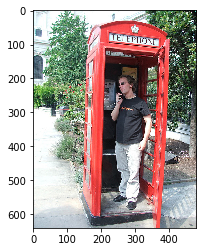

In [45]:
split = "train"
path = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/'
json_file = '/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_train2014.json'
df_train = get_data(path, json_file, split)
print(df_train.head())
img = plt.imread(df_train['path'][2])
plt.imshow(img)
plt.show()

       id                           name  \
0  391895  COCO_val2014_000000391895.jpg   
1  522418  COCO_val2014_000000522418.jpg   
2  184613  COCO_val2014_000000184613.jpg   
3  318219  COCO_val2014_000000318219.jpg   
4  554625  COCO_val2014_000000554625.jpg   

                                                path  label     cls  
0  /home/aanwar/models/research/slim/data/data/vi...      1  person  
1  /home/aanwar/models/research/slim/data/data/vi...      1  person  
2  /home/aanwar/models/research/slim/data/data/vi...      1  person  
3  /home/aanwar/models/research/slim/data/data/vi...      1  person  
4  /home/aanwar/models/research/slim/data/data/vi...      1  person  


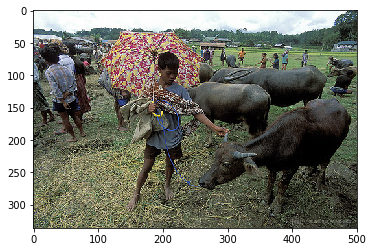

In [46]:
split = "val"
path = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/val2014/'
json_file = '/home/aanwar/models/research/slim/data/data/visualwakewords/instances_visualwakewords_val2014.json'
df_test = get_data(path, json_file, split)
print(df_test.head())
img = plt.imread(df_test['path'][2])
plt.imshow(img)
plt.show()

### Annotation

In [47]:
train_label_data = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/annotations/captions_train2014.json'

with open(train_label_data) as f:
    data = json.load(f)

In [48]:
data.keys()

dict_keys(['info', 'images', 'licenses', 'annotations'])

In [49]:
data['info']

{'description': 'COCO 2014 Dataset',
 'url': 'http://cocodataset.org',
 'version': '1.0',
 'year': 2014,
 'contributor': 'COCO Consortium',
 'date_created': '2017/09/01'}

In [50]:
data['images'][0]

{'license': 5,
 'file_name': 'COCO_train2014_000000057870.jpg',
 'coco_url': 'http://images.cocodataset.org/train2014/COCO_train2014_000000057870.jpg',
 'height': 480,
 'width': 640,
 'date_captured': '2013-11-14 16:28:13',
 'flickr_url': 'http://farm4.staticflickr.com/3153/2970773875_164f0c0b83_z.jpg',
 'id': 57870}

In [51]:
data['licenses'][0]

{'url': 'http://creativecommons.org/licenses/by-nc-sa/2.0/',
 'id': 1,
 'name': 'Attribution-NonCommercial-ShareAlike License'}

In [52]:
data['annotations']['image_id' == '392136']

{'image_id': 318556,
 'id': 48,
 'caption': 'A very clean and well decorated empty bathroom'}

In [53]:
captions = {}
all_img_path = []

for annot in data['annotations']:
    caption = annot['caption']
    img_id = annot['image_id']
    img_path = train_data + 'COCO_train2014_' + '%012d.jpg' % (img_id)
    all_img_path.append(img_path)
    
    break

### Display Samples images

JPEG
(500, 347)
RGB
uint8
(347, 500, 3)


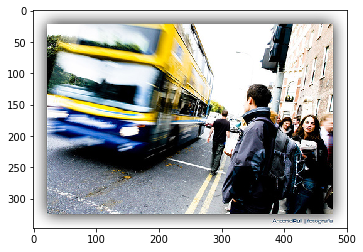

In [54]:
sample_img = '/home/aanwar/models/research/slim/data/data/visualwakewords/coco_dataset/train2014/COCO_train2014_000000392136.jpg'

image = Image.open(sample_img)
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)

# show the image
image = plt.imread(sample_img)
# summarize shape of the pixel array
print(image.dtype)
print(image.shape)
# display the array of pixels as an image
plt.imshow(image)
plt.show()

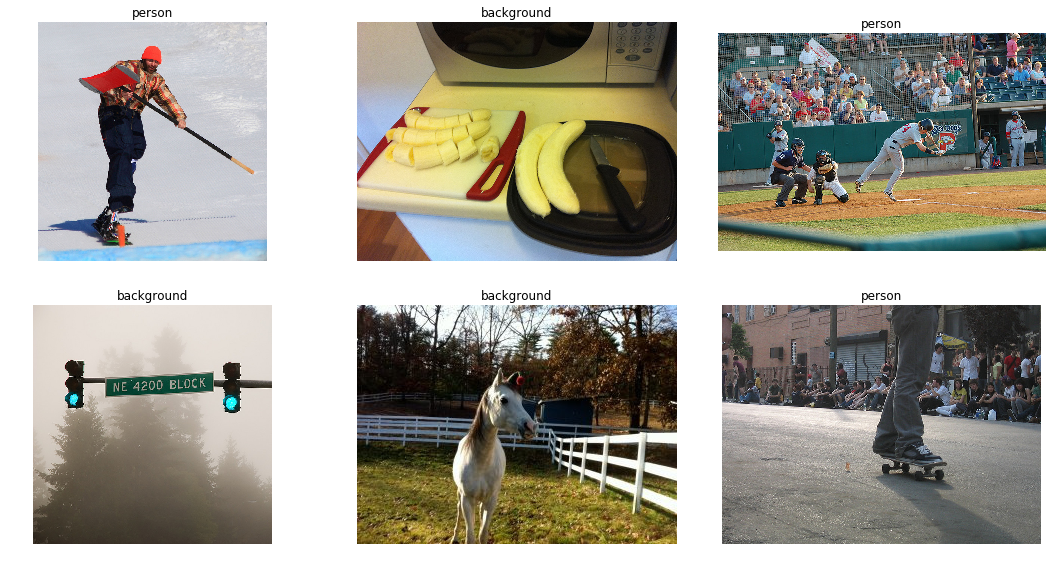

In [55]:
np.random.seed(222)
samples = np.random.choice(len(df_train), 6)

imgs = []
lab = []
for sample in samples:
    imgs.append(plt.imread(df_train['path'][sample]))
    lab.append(df_train['label'][sample])

fig, ax = plt.subplots(2,3, figsize=(15,8))
ax[0][0].imshow(imgs[0]); ax[0][0].axis('off'); ax[0][0].set_title(classes[lab[0]])
ax[0][1].imshow(imgs[1]); ax[0][1].axis('off'); ax[0][1].set_title(classes[lab[1]])
ax[0][2].imshow(imgs[2]); ax[0][2].axis('off'); ax[0][2].set_title(classes[lab[2]])
ax[1][0].imshow(imgs[3]); ax[1][0].axis('off'); ax[1][0].set_title(classes[lab[3]])
ax[1][1].imshow(imgs[4]); ax[1][1].axis('off'); ax[1][1].set_title(classes[lab[4]])
ax[1][2].imshow(imgs[5]); ax[1][2].axis('off'); ax[1][2].set_title(classes[lab[5]])
fig.tight_layout()
plt.show()

### Preprocess data

In [86]:
baseline = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(100,100,3)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid')
])
baseline.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               3840128   
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 258       
Total params: 3,840,386
Trainable params: 3,840,386
Non-trainable params: 0
_________________________________________________________________


In [87]:
baseline.compile(loss='binary_crossentropy', 
                 optimizer='adam', 
                 metrics=['accuracy'])

In [88]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82783 entries, 0 to 82782
Data columns (total 5 columns):
id       82783 non-null object
name     82783 non-null object
path     82783 non-null object
label    82783 non-null int64
cls      82783 non-null object
dtypes: int64(1), object(4)
memory usage: 3.2+ MB


In [89]:
df_train_small = df_train.sample(frac=0.20)

In [90]:
df_train_small.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16557 entries, 41411 to 39211
Data columns (total 5 columns):
id       16557 non-null object
name     16557 non-null object
path     16557 non-null object
label    16557 non-null int64
cls      16557 non-null object
dtypes: int64(1), object(4)
memory usage: 776.1+ KB


In [91]:
datagen = ImageDataGenerator(validation_split=0.3,rescale = 1.0/255.)

In [92]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_small,
    x_col='name', 
    y_col='cls',
    directory=train_data,
    subset='training', 
    target_size=(100,100), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)
valid_generator = datagen.flow_from_dataframe(
    dataframe=df_train_small,
    x_col='name', 
    y_col='cls',
    directory=train_data,
    subset='validation', 
    target_size=(100,100), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)

Found 11590 validated image filenames belonging to 2 classes.
Found 4967 validated image filenames belonging to 2 classes.


In [93]:
history = baseline.fit_generator(generator=train_generator,
                    steps_per_epoch=100,
                    validation_data=valid_generator,
                    validation_steps=50,
                    epochs=10
)

Epoch 1/10
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100/100 [==============================] - 58s 584ms/step - loss: 7.7472 - accuracy: 0.4902 - val_loss: 8.2893 - val_accuracy: 0.4610
Epoch 2/10
100/100 [==============================] - 40s 400ms/step - loss: 7.7357 - accuracy: 0.4970 - val_loss: 8.2893 - val_accuracy: 0.4610
Epoch 3/10
100/100 [==============================] - 41s 410ms/step - loss: 8.1202 - accuracy: 0.4720 - val_loss: 8.2893 - val_accuracy: 0.4610
Epoch 4/10
100/100 [==============================] - 40s 399ms/step - loss: 8.0356 - accuracy: 0.4775 - val_loss: 8.2893 - val_accuracy: 0.4610
Epoch 5/10
100/100 [==============================] - 42s 415ms/step - loss: 8.0510 - accuracy: 0.4765 - val_loss: 8.2893 - val_accuracy: 0.4610
Epoch 6/10
100/100 [==============================] - 37s 375ms/step - loss: 8.0817 - accuracy: 0.4745 - val_loss: 8.2893 - val_accuracy: 0.4610
Epoch 7/10
100/100 [================

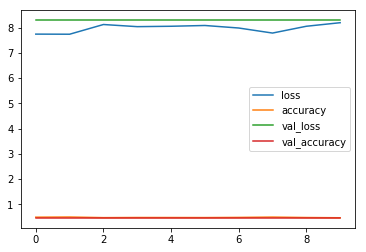

In [94]:
pd.DataFrame(history.history).plot()
plt.show()

In [102]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu',input_shape=(250,250,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64,(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2, activation='sigmoid'),
])
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 248, 248, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 124, 124, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 122, 122, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 61, 61, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 59, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 29, 29, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 53824)            

In [104]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy']
             )

In [105]:
datagen = ImageDataGenerator(validation_split=0.3,rescale = 1.0/255.)

In [106]:
train_generator = datagen.flow_from_dataframe(
    dataframe=df_train_small,
    x_col='name', 
    y_col='cls',
    directory=train_data,
    subset='training', 
    target_size=(250,250), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)
valid_generator = datagen.flow_from_dataframe(
    dataframe=df_train_small,
    x_col='name', 
    y_col='cls',
    directory=train_data,
    subset='validation', 
    target_size=(250,250), 
    batch_size=20,
    color_mode='rgb', 
    clas_mode='categorical'
)


Found 11590 validated image filenames belonging to 2 classes.
Found 4967 validated image filenames belonging to 2 classes.


In [107]:
history = model.fit_generator(generator=train_generator,
                    steps_per_epoch=100,
                    validation_data=valid_generator,
                    validation_steps=50,
                    epochs=10
)

Epoch 1/10
100/100 [==============================] - 158s 2s/step - loss: 0.7423 - accuracy: 0.5480 - val_loss: 0.6550 - val_accuracy: 0.6140
Epoch 2/10
100/100 [==============================] - 155s 2s/step - loss: 0.6635 - accuracy: 0.6030 - val_loss: 0.6578 - val_accuracy: 0.6000
Epoch 3/10
100/100 [==============================] - 154s 2s/step - loss: 0.6535 - accuracy: 0.6267 - val_loss: 0.6460 - val_accuracy: 0.6365
Epoch 4/10
100/100 [==============================] - 154s 2s/step - loss: 0.6538 - accuracy: 0.6143 - val_loss: 0.6432 - val_accuracy: 0.6240
Epoch 5/10
100/100 [==============================] - 154s 2s/step - loss: 0.6417 - accuracy: 0.6363 - val_loss: 0.6464 - val_accuracy: 0.6470
Epoch 6/10
100/100 [==============================] - 153s 2s/step - loss: 0.6313 - accuracy: 0.6435 - val_loss: 0.6449 - val_accuracy: 0.6370
Epoch 7/10
100/100 [==============================] - 153s 2s/step - loss: 0.6036 - accuracy: 0.6755 - val_loss: 0.6720 - val_accuracy: 0.5995

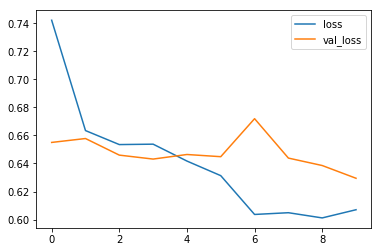

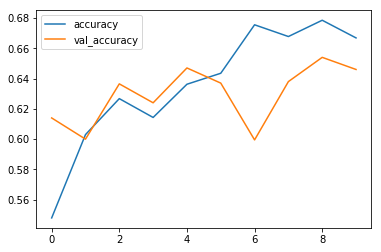

In [129]:
df_hist = pd.DataFrame(history.history)
df_hist[['loss','val_loss']].plot()
df_hist[['accuracy', 'val_accuracy']].plot()
plt.show()
